#**Introducción**

Este código sirve para convertir todos los datos desagregados por las provincias de España en GIFs que muestren en un mapa la evolución de una determinada variable en todas las provincias a lo largo del tiempo. 

El código está simplificado de tal manera que solo es necesario introducir unas pocas instrucciones para que genere el GIF. Es decir, no hace falta aprender a usar el código, solo correrlo siguiendo las siguientes instrucciones:

1-Descarga un fichero de datos provinciales en formate CSV separado por puntos y comas. El programa no admite ningún otro formato.

2-Asegurate que dentro de esos datos no se incluya ni el total nacional ni los datos de Ceuta y Melilla, ni cualquier otra división que no sea la estrictamente provincial. En caso de meter un fichero que posea otra división a parte de esta dará el error "list index out of range".

3-Mete una variable cada vez. Puede dar error si tratas hacer a la vez un GIF de dos variables distintas.

Siguiendo estas tres instrucciones ya puedes correr el programa. Este consiste en tres celdas, la primera celda que corras sirve para descargar las librerías necesarias. La segunda sirve para descargar los datos en Colab y seleccionar como quieres el GIF (Título, color...). La última es la que se corre para generar el GIF. Este suele tardar en generarse de cuatro a siete minutos así que sé paciente y haz otra cosa mientras tanto.

In [1]:
# Cargamos la librerias que vamos a utilizar
import pandas as pd
!pip install geopandas
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
import PIL
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 7.4 MB/s 
     |████████████████████████████████| 6.3 MB 41.9 MB/s 
     |████████████████████████████████| 16.7 MB 286 kB/s 


In [3]:
print('Introduzca archivo de datos provinciales')
from google.colab import files
uploaded = files.upload()
print('Introduzca nombre del archivo (se tiene que introducir el nombre con el que se ha descargado, ej: Industria.csv)')
Archivo=input() #input() se usa para que te salga una ventanita donte tienes que introducir los datos
datos=pd.read_csv(f"{Archivo}", sep=";", decimal=",", engine="python",  encoding="latin-1") #f"{Archivo}" se usa para que lo que introduzcas en la ventanita que te salga se reproduzca dentro del propio código"

print('Introduzca el nombre del mapa')
Nombre=input()
print('Introduzca qué número quiere que sea el más bajo que enseñe el mapa')
Mínimo=input()
print('Introduzca qué número quiere que sea el más alto que enseñe el mapa')
Máximo=input()
print('Elija que color de mapa quiere:Rojo, Azul, Verde, Naranja, Rosa (Acuerdate de poner la primera letra en mayúscula)')
Color=input()
if Color=='Rojo': #Aquí usamos la sentencia if para que la función C se convierta en un determinado código de colores según el código que se meta
  C='Reds'
elif Color=='Azul':
  C='Blues'
elif Color=='Naranja':
  C='Oranges'
elif Color=='Verde':
  C='Greens'
elif Color=='Rosa':
  C='pink_r'

Introduzca archivo de datos provinciales


Saving Industria.csv to Industria (1).csv
Introduzca nombre del archivo (se tiene que introducir el nombre con el que se ha descargado, ej: Industria.csv)
Industria.csv
Introduzca el nombre del mapa
%Ocupados trabajando en industria
Introduzca qué número quiere que sea el más bajo que enseñe el mapa
0
Introduzca qué número quiere que sea el más alto que enseñe el mapa
25
Elija que color de mapa quiere:Rojo, Azul, Verde, Naranja, Rosa (Acuerdate de poner la primera letra en mayúscula
Verde


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

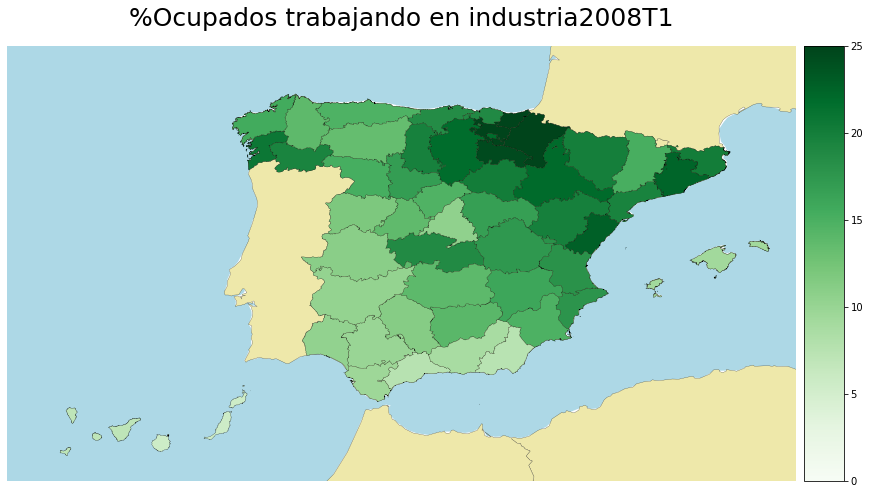

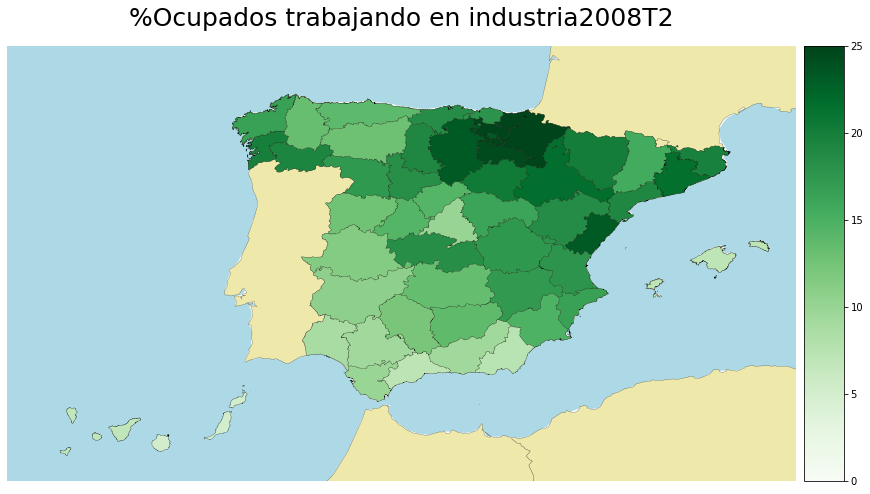

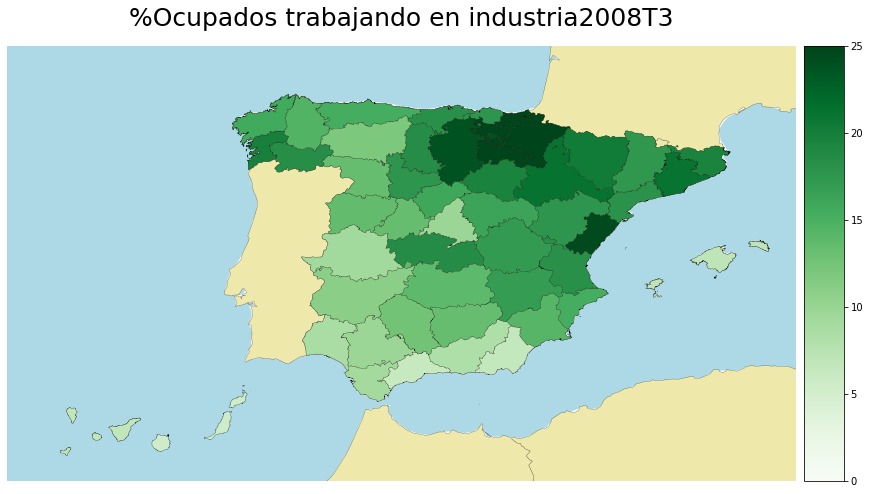

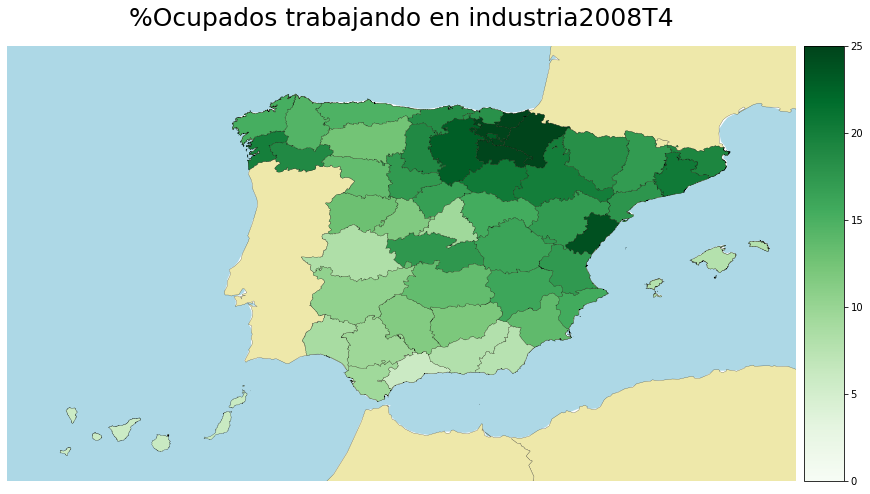

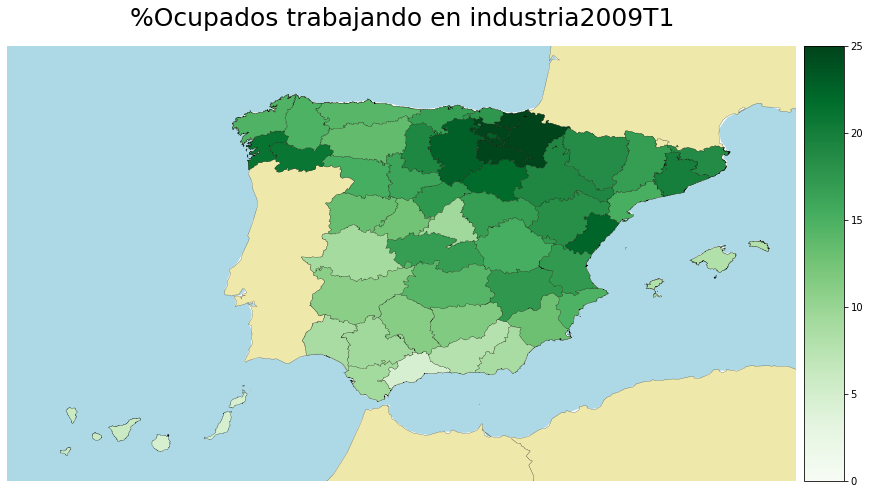

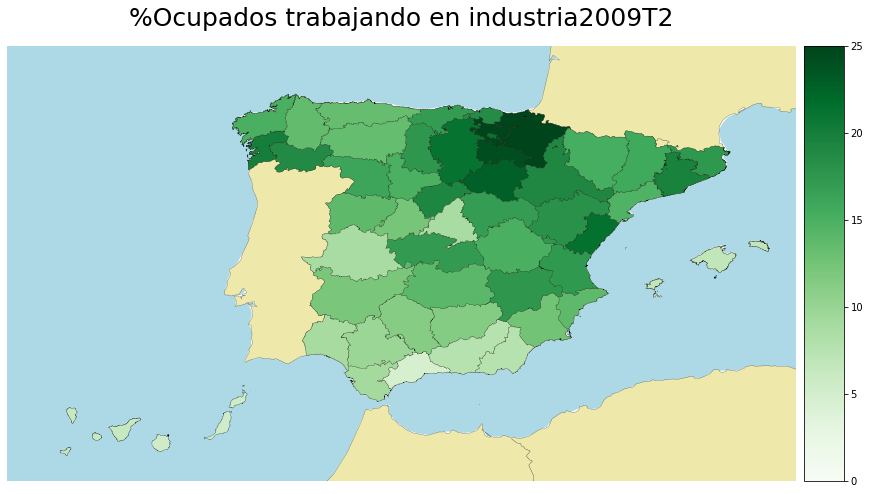

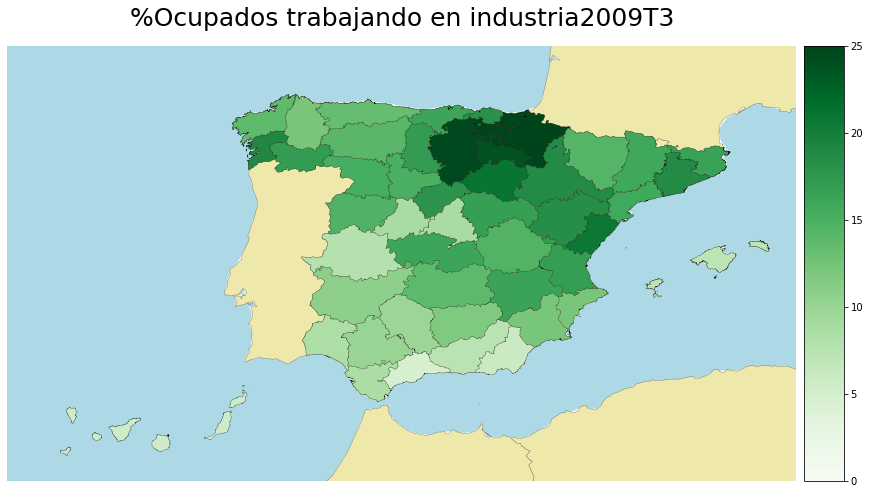

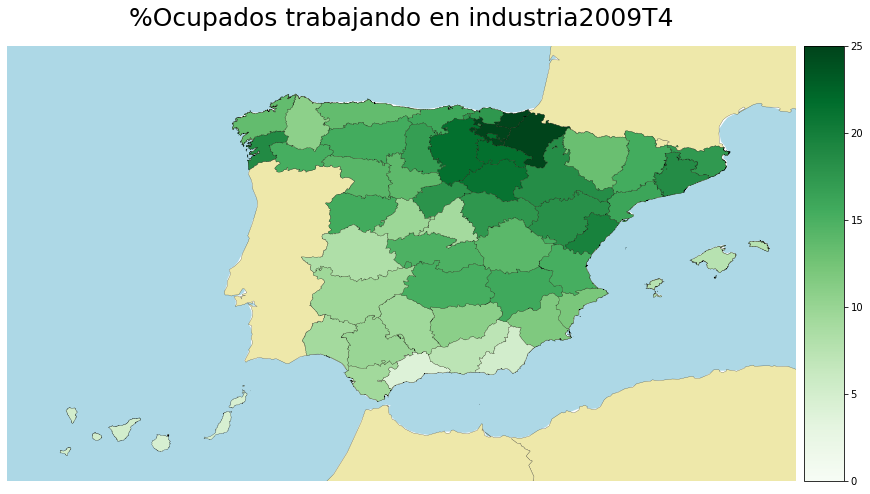

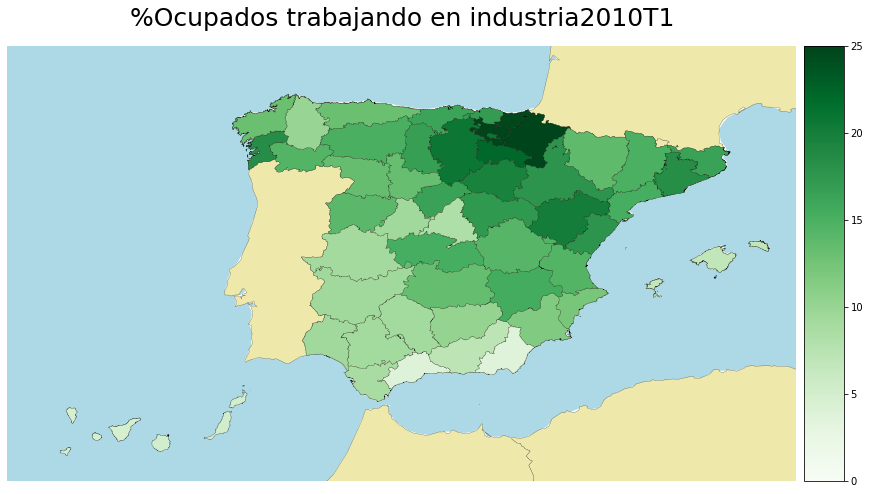

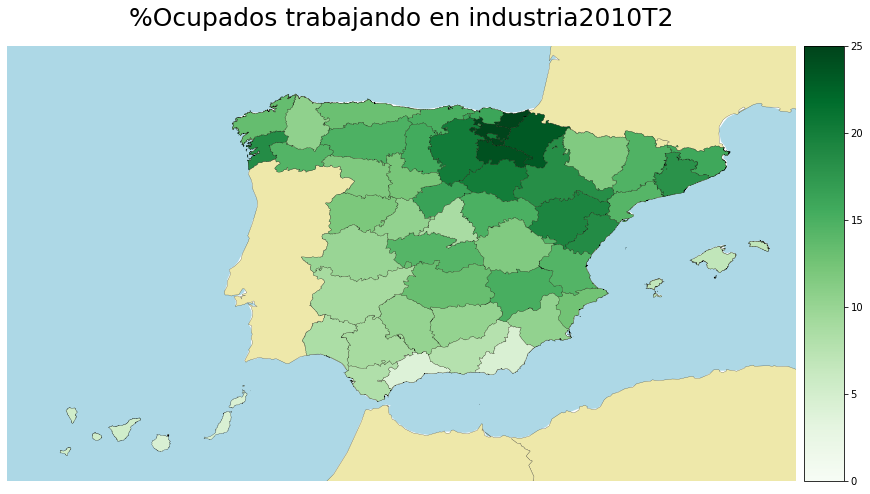

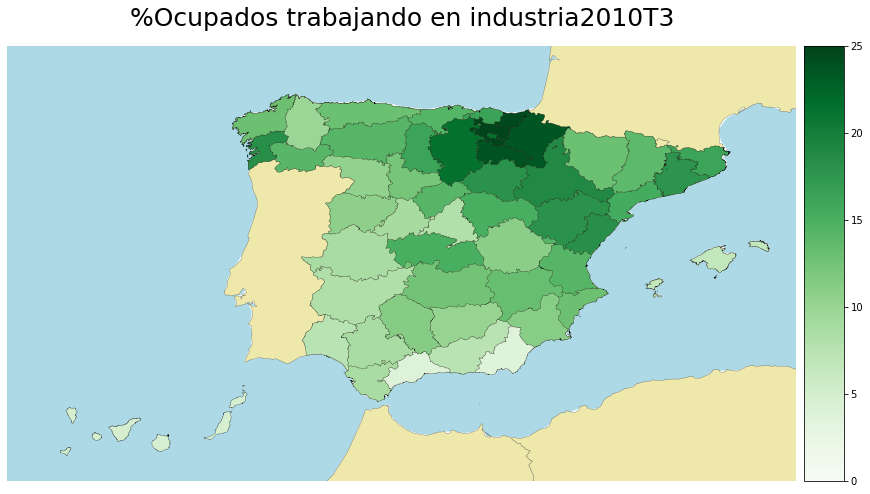

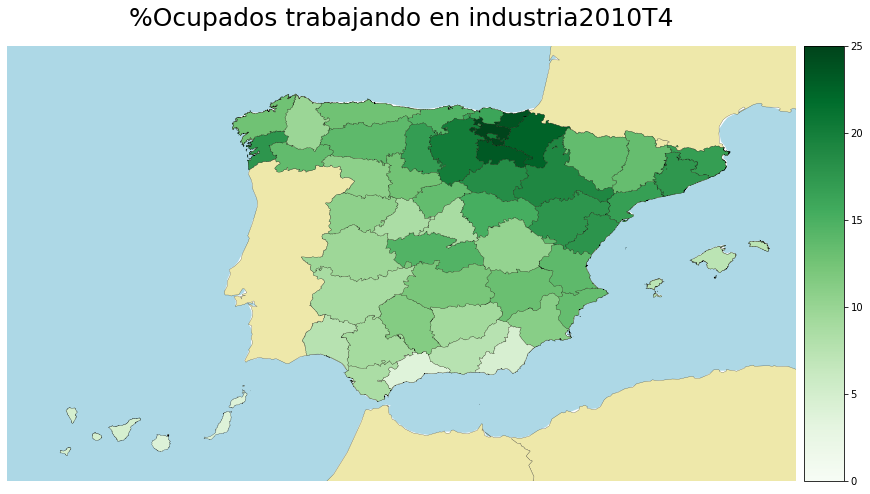

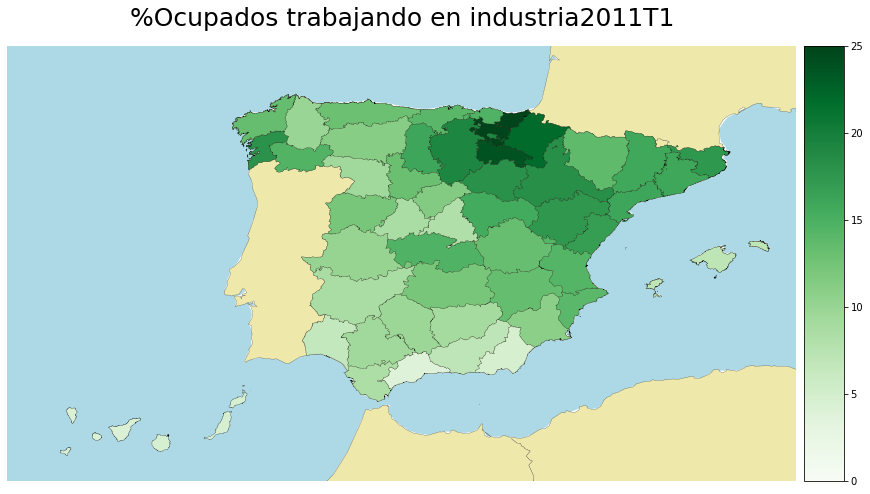

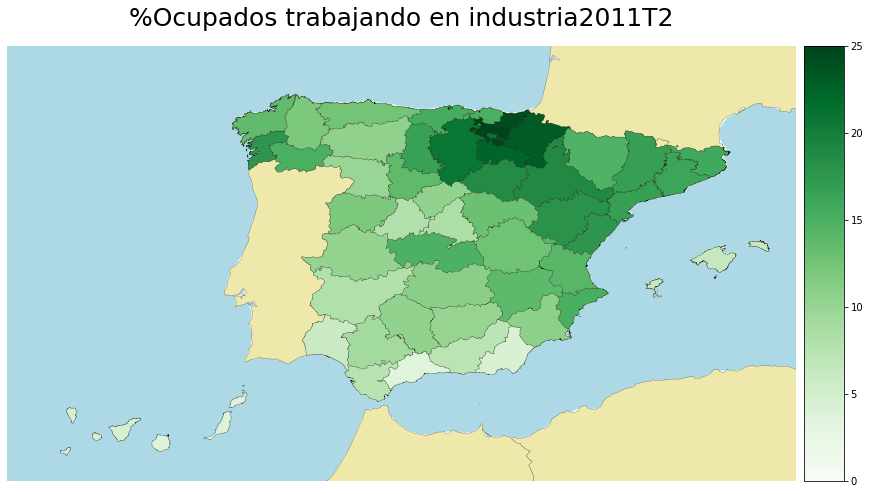

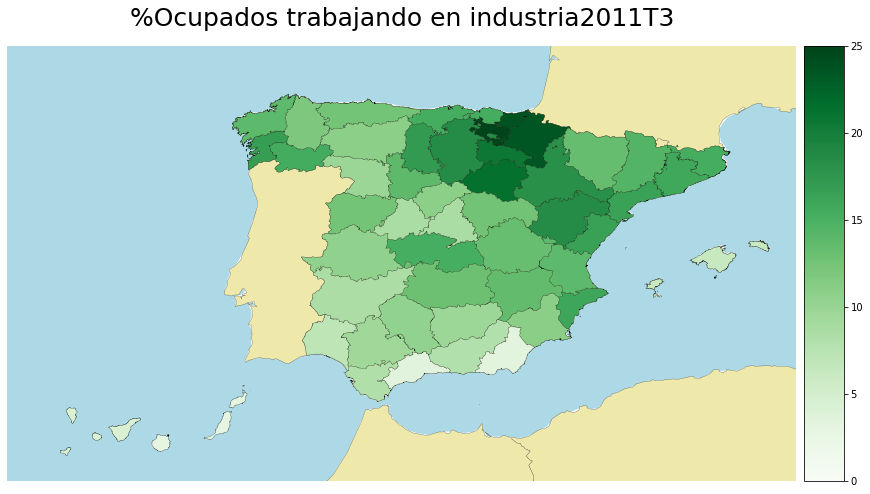

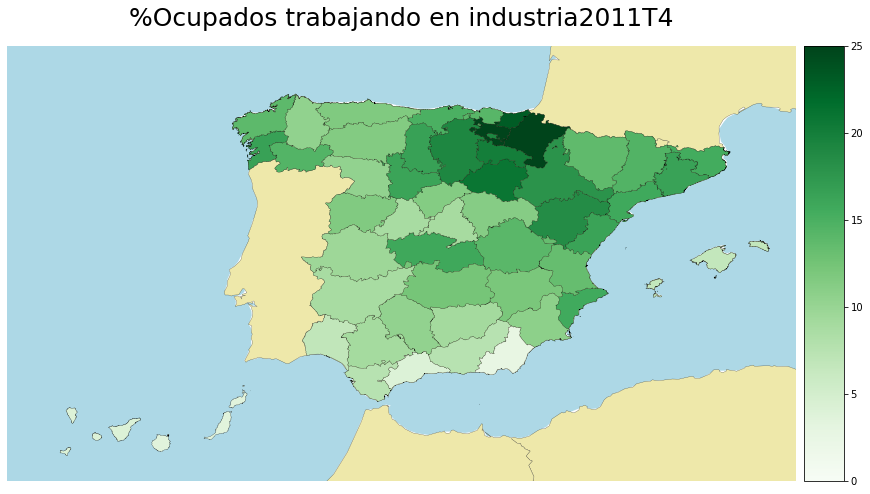

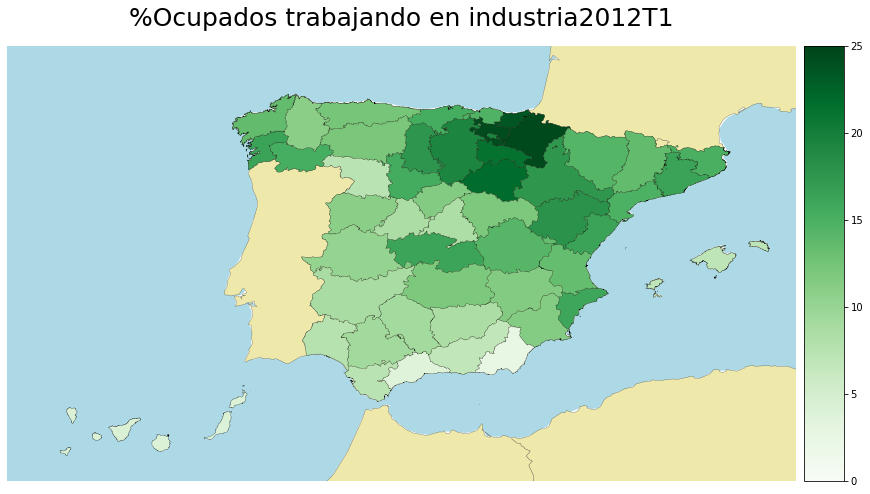

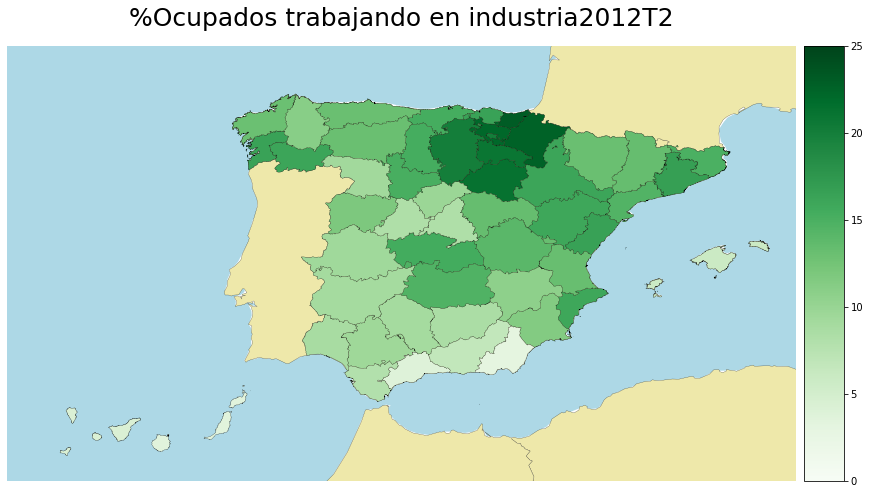

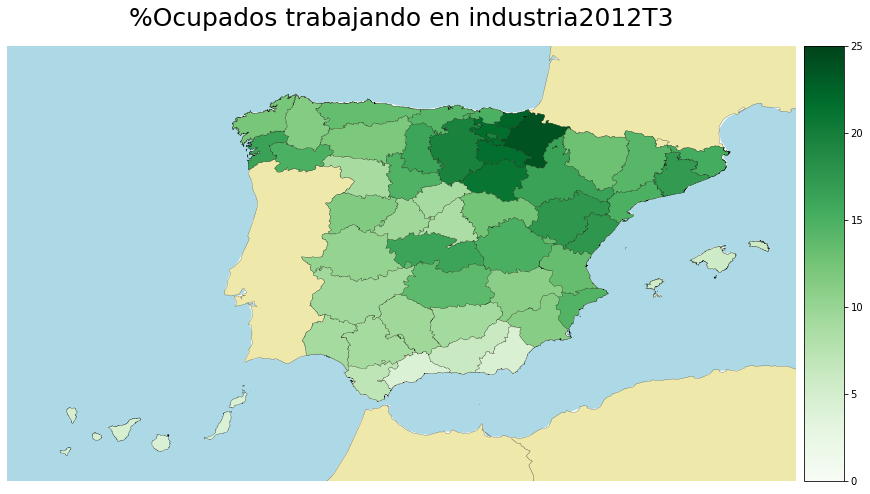

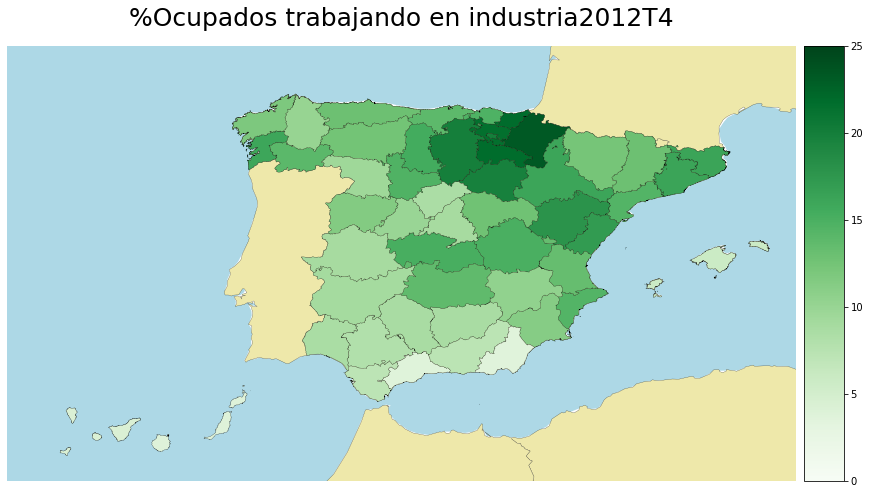

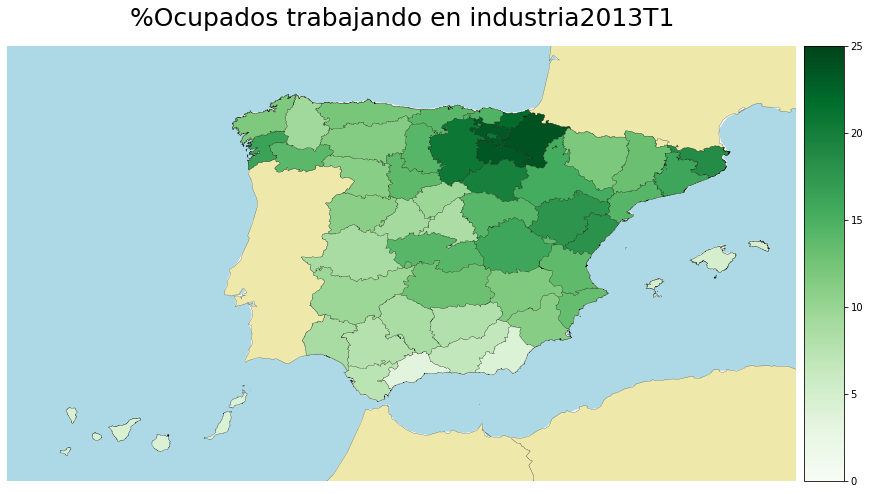

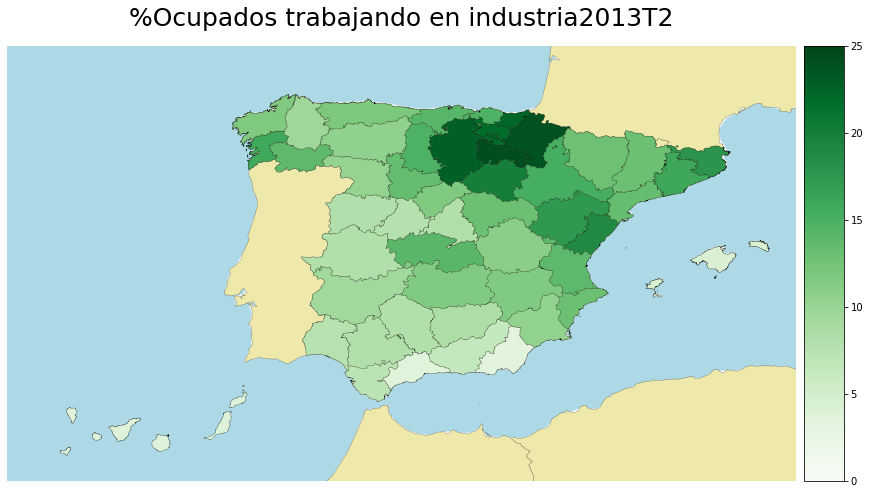

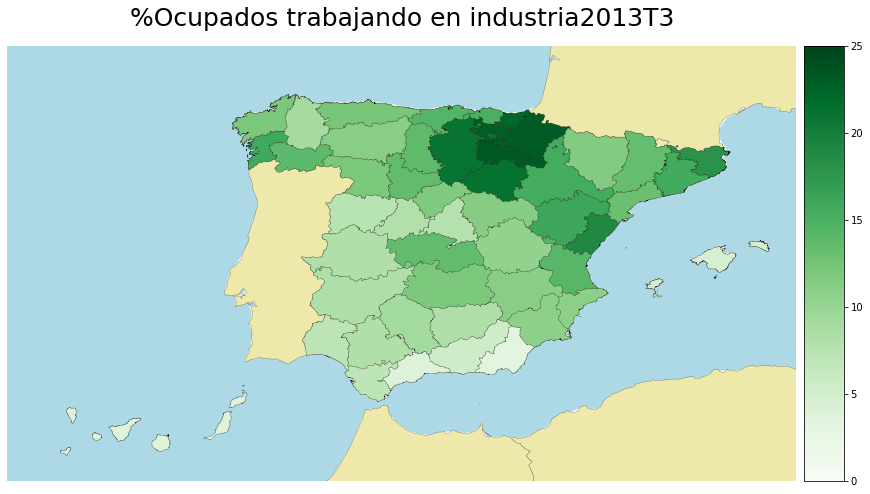

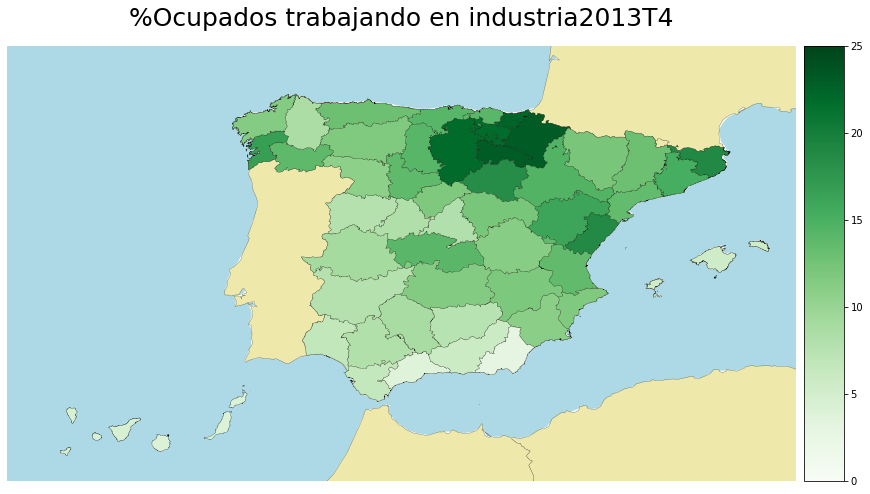

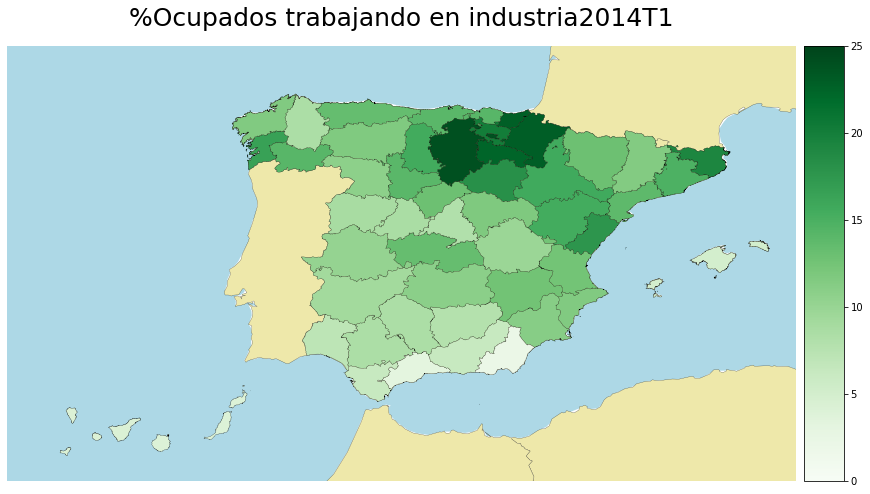

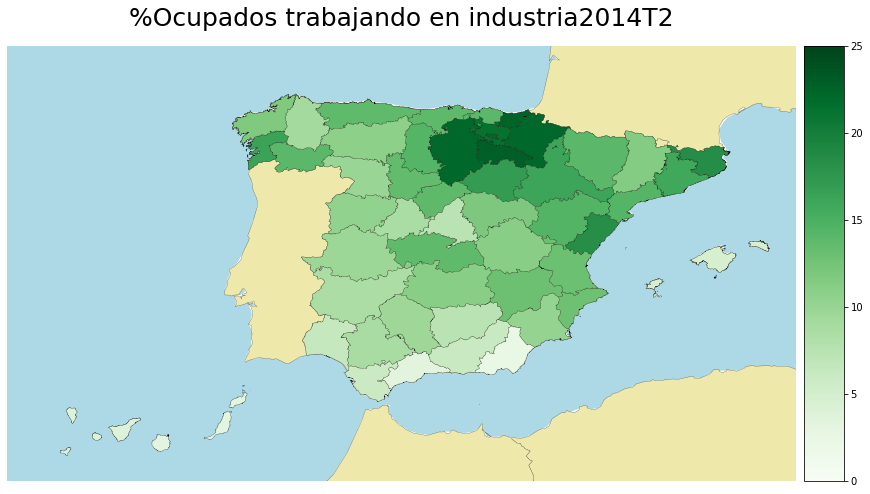

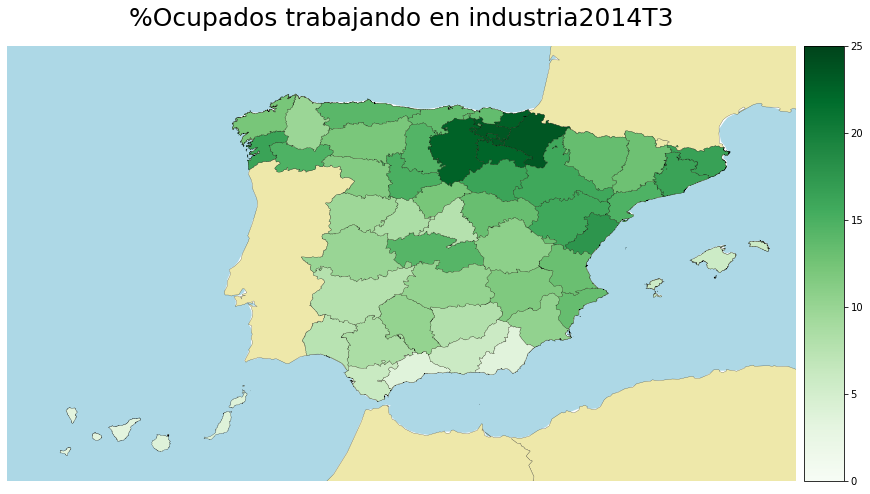

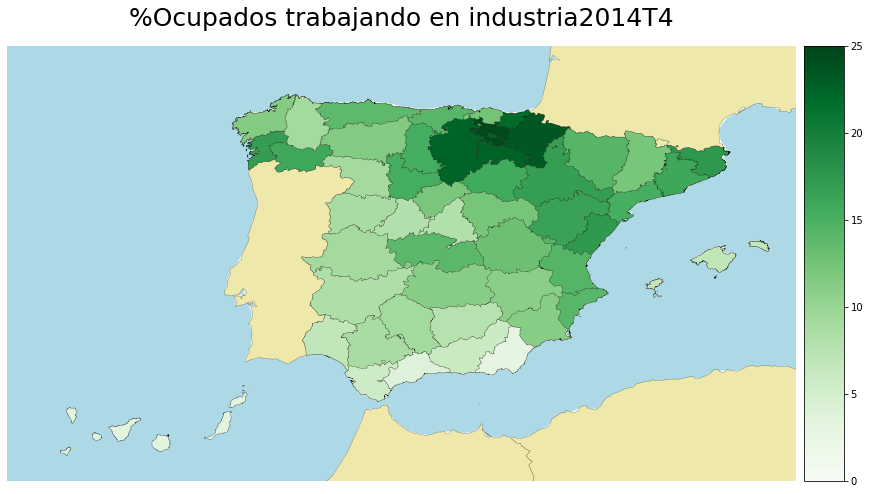

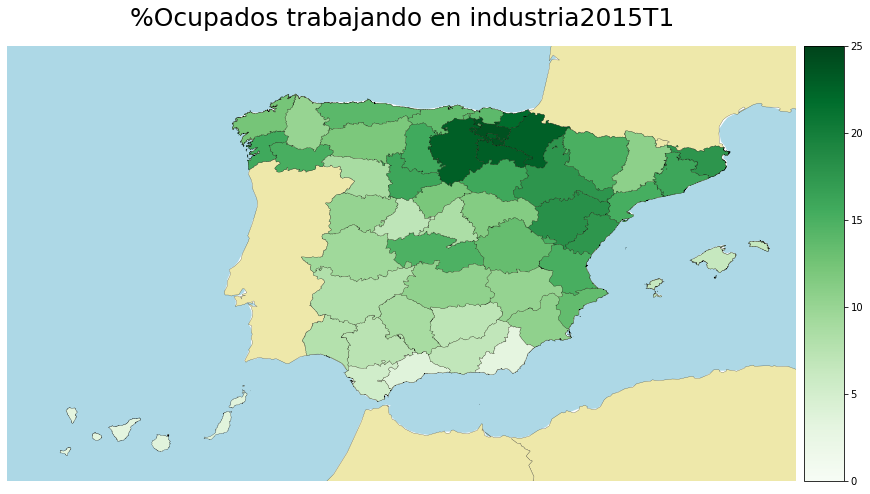

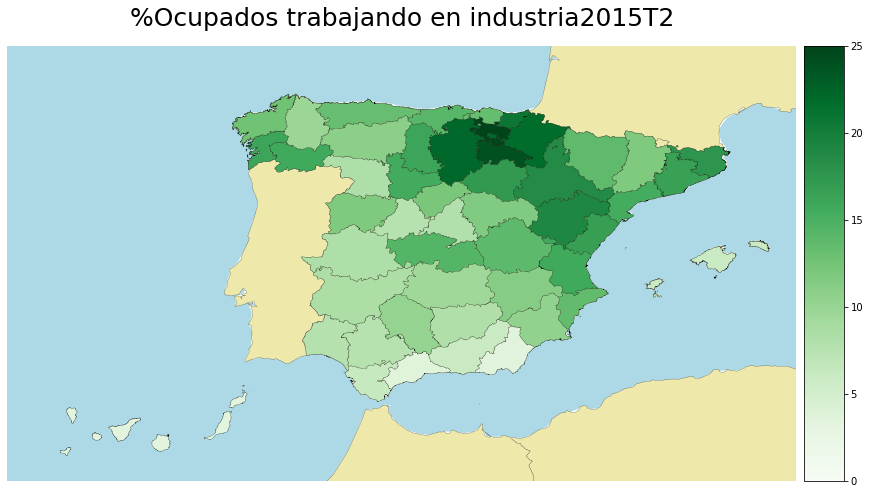

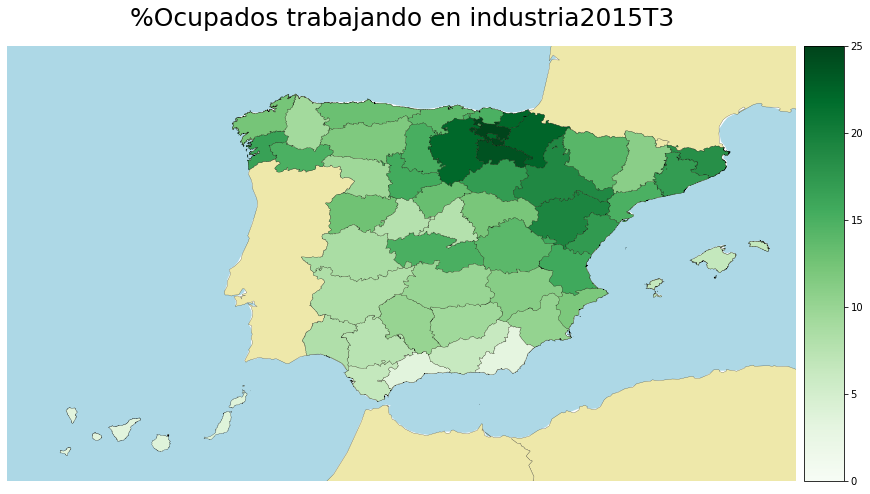

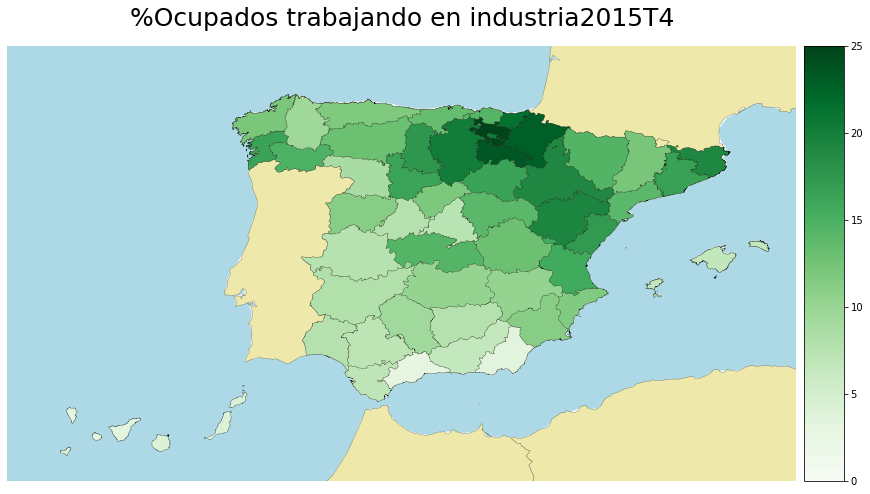

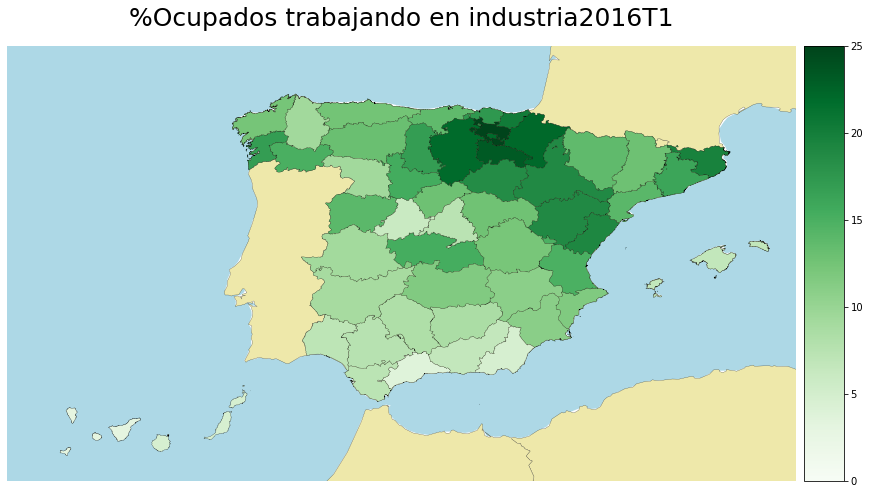

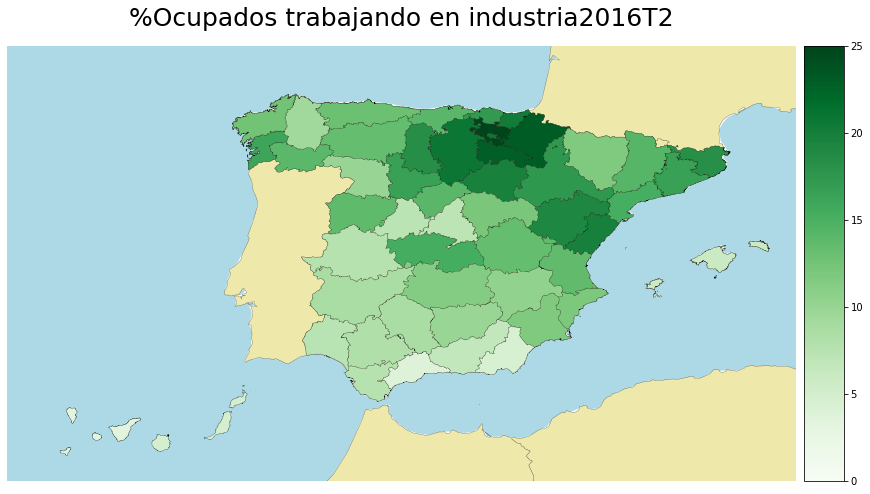

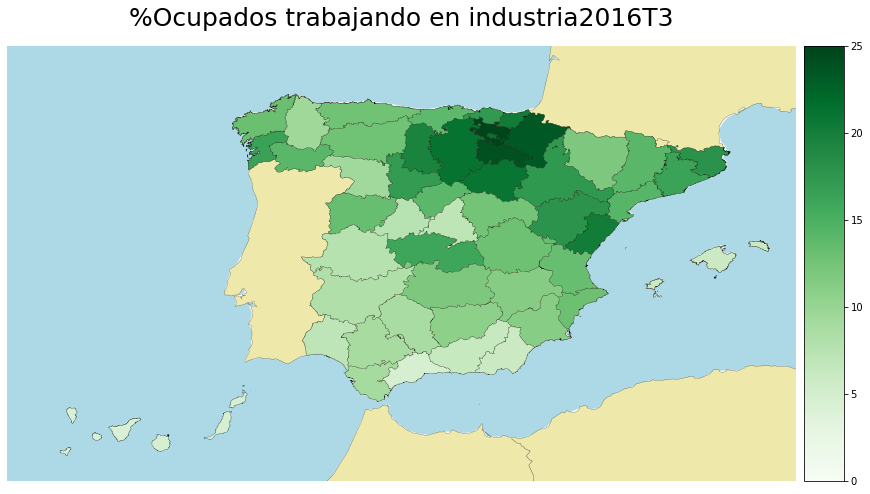

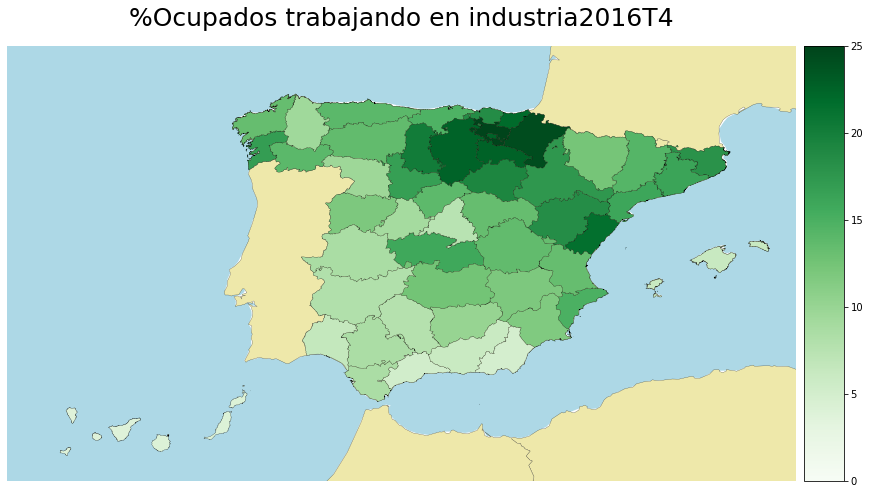

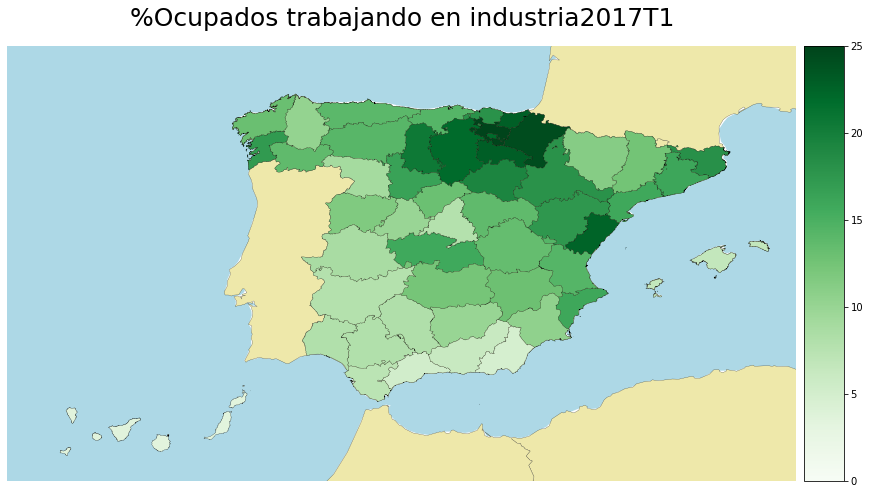

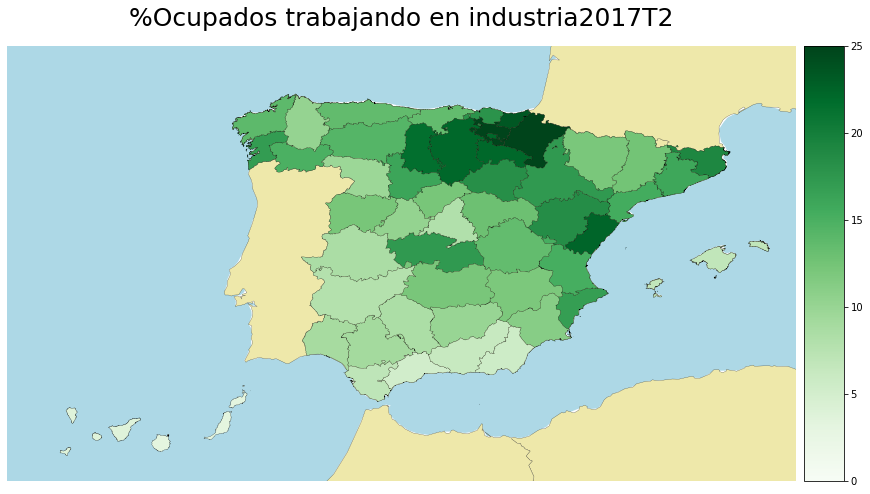

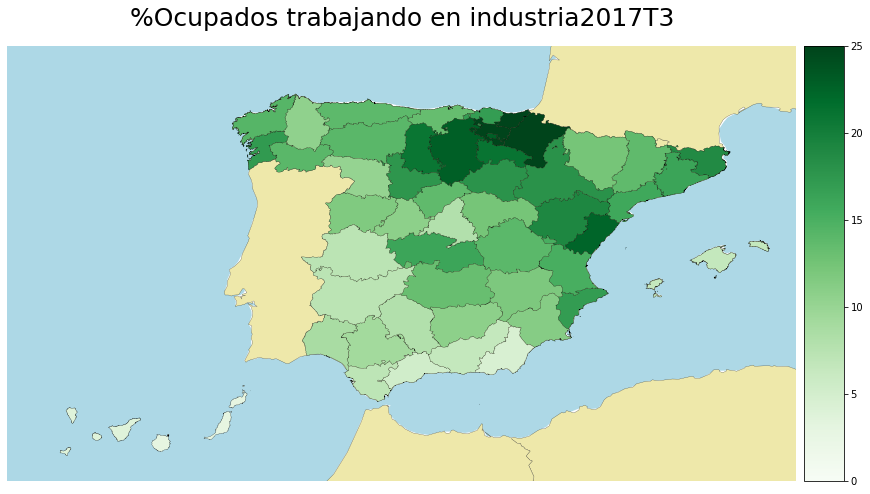

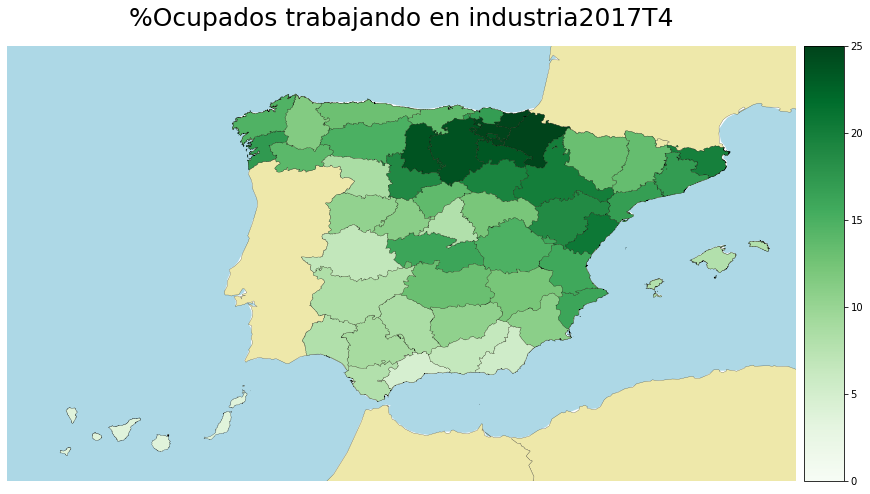

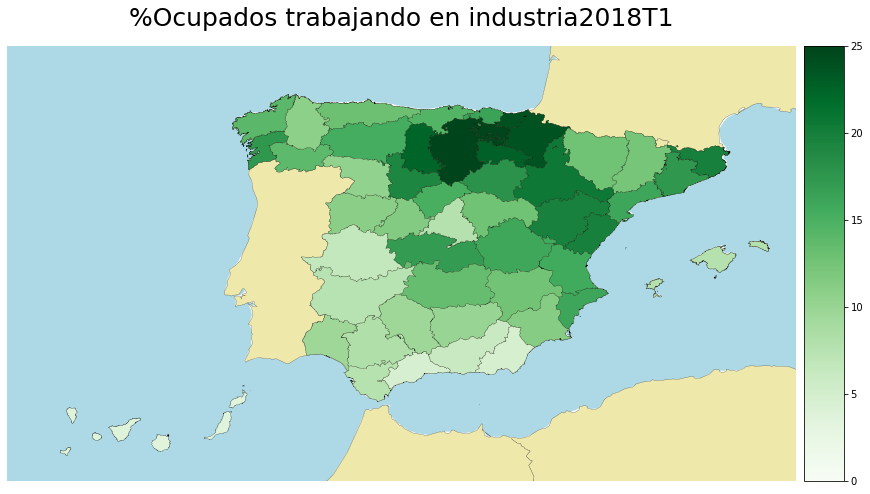

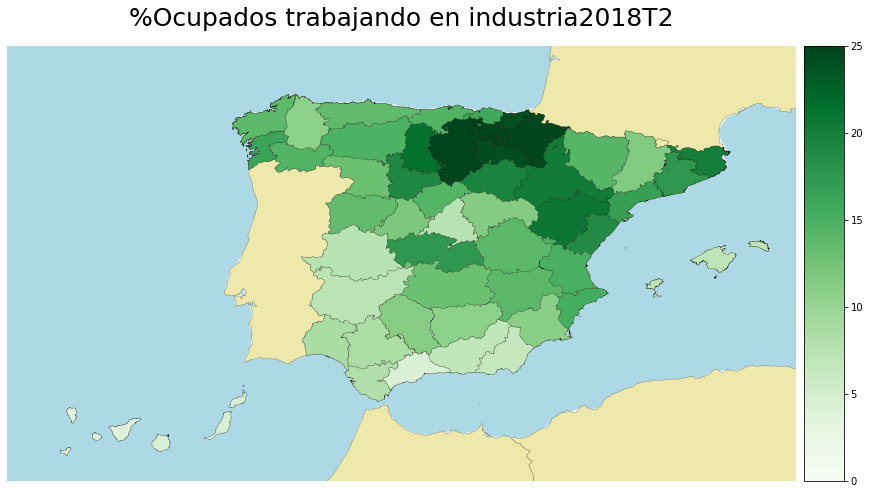

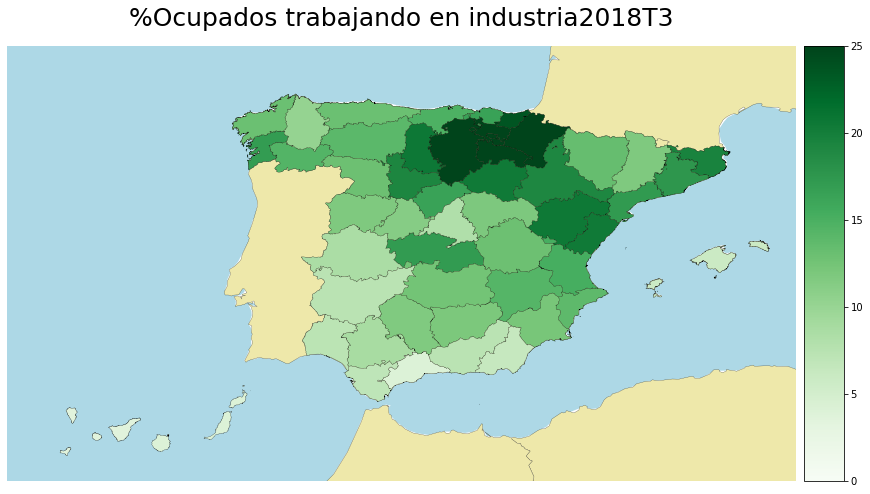

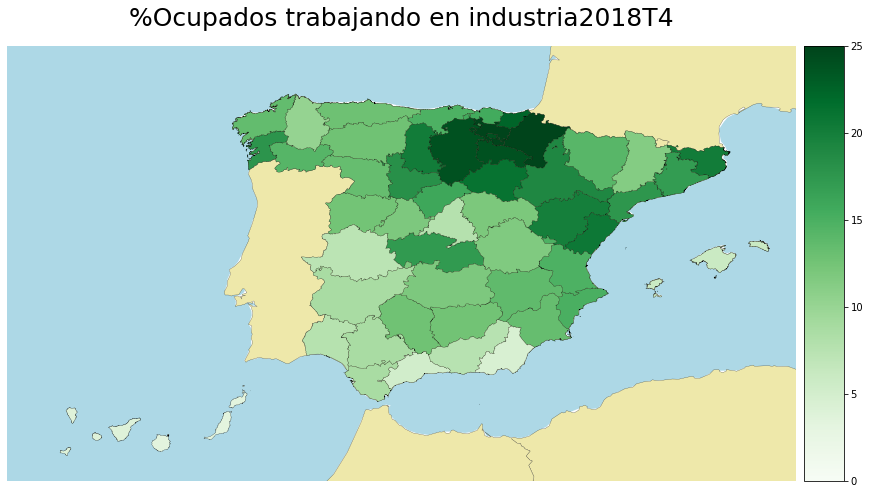

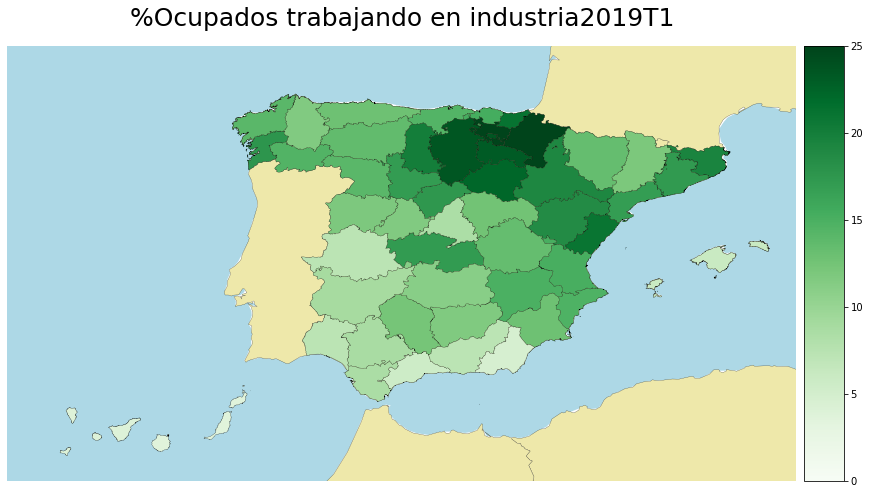

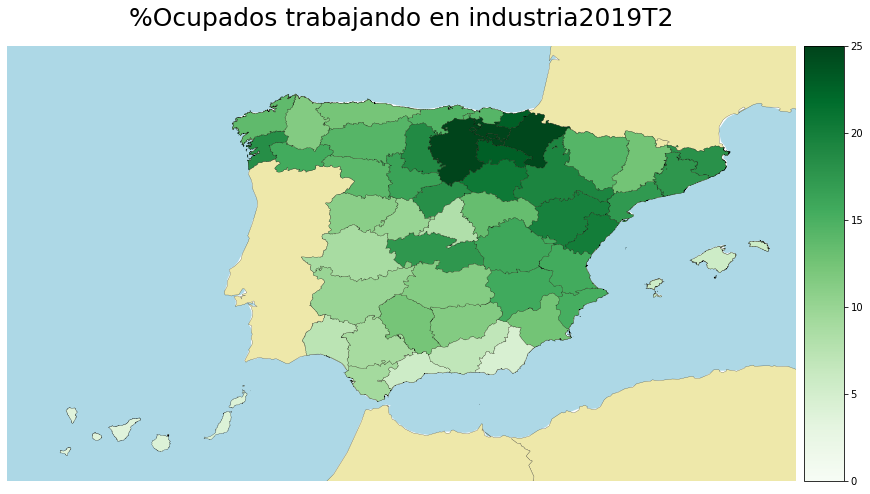

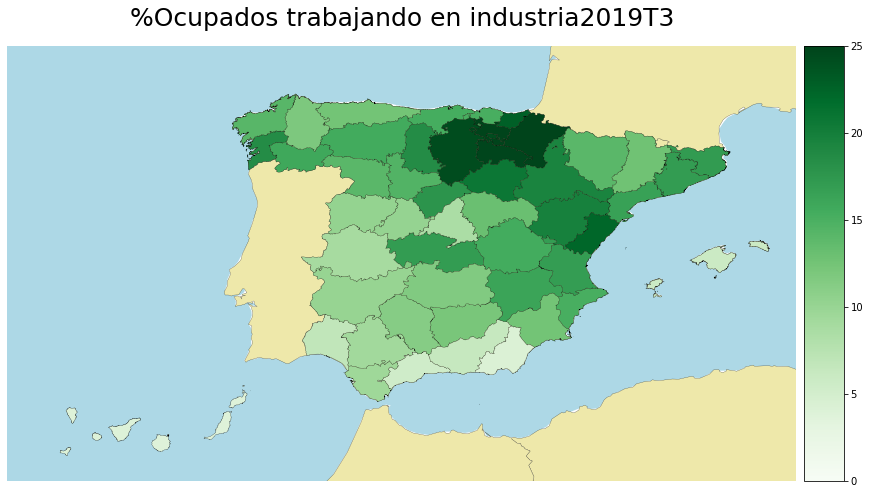

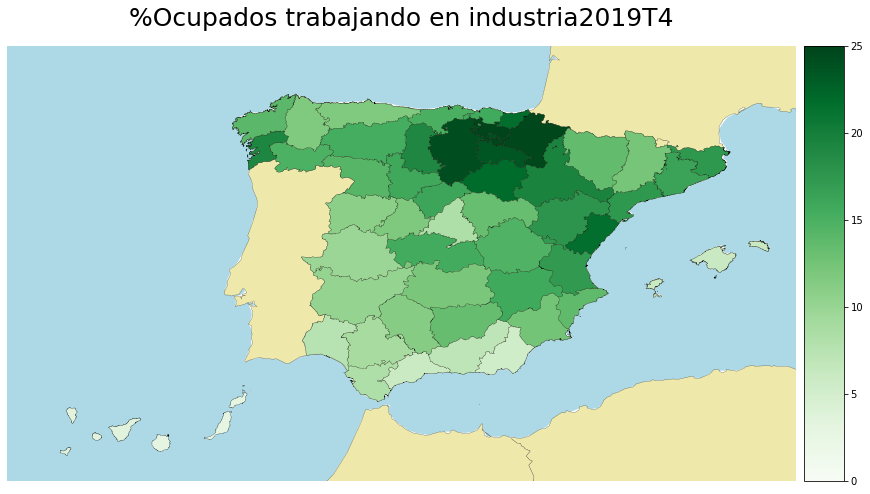

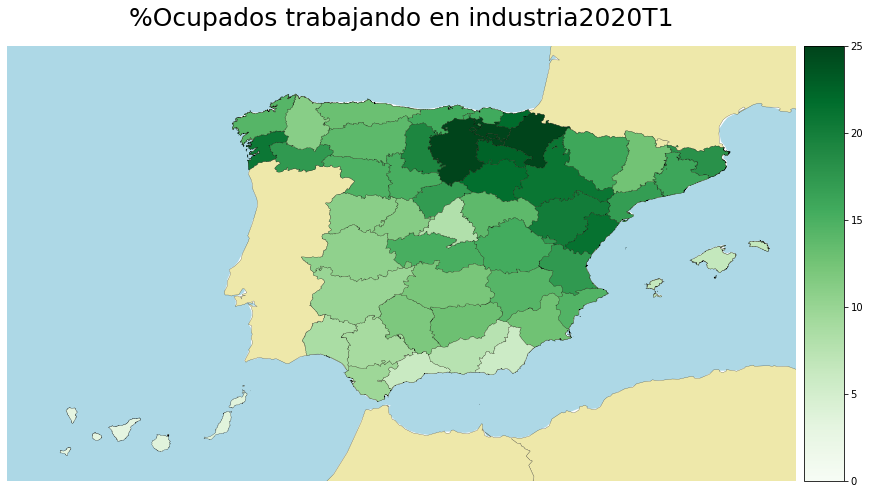

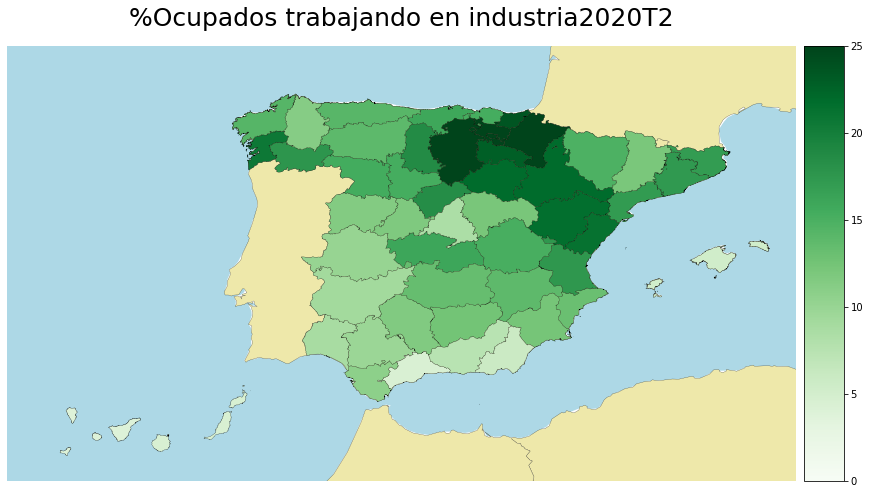

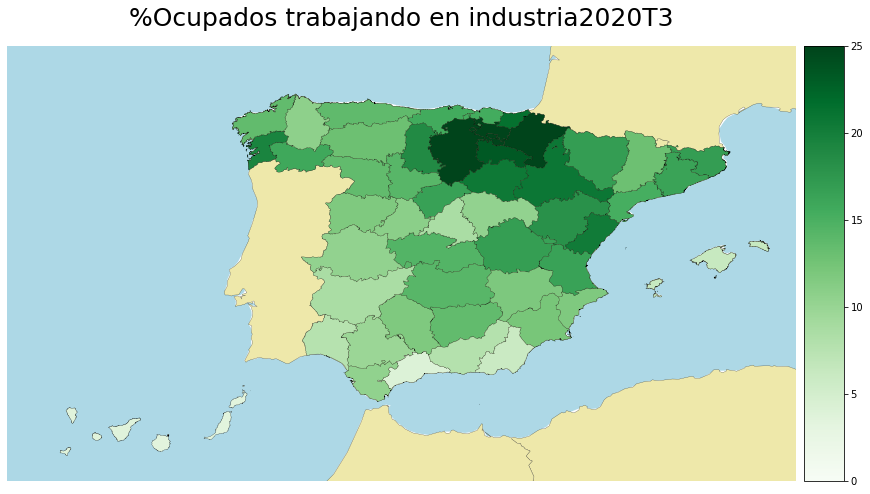

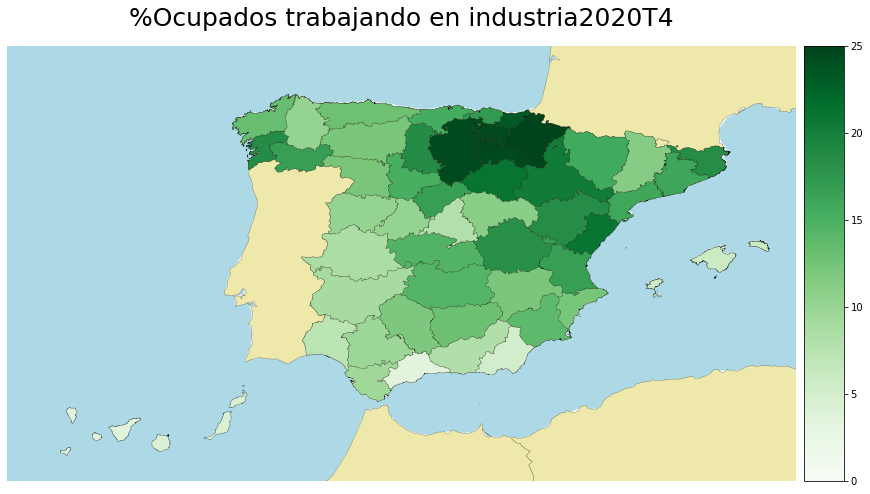

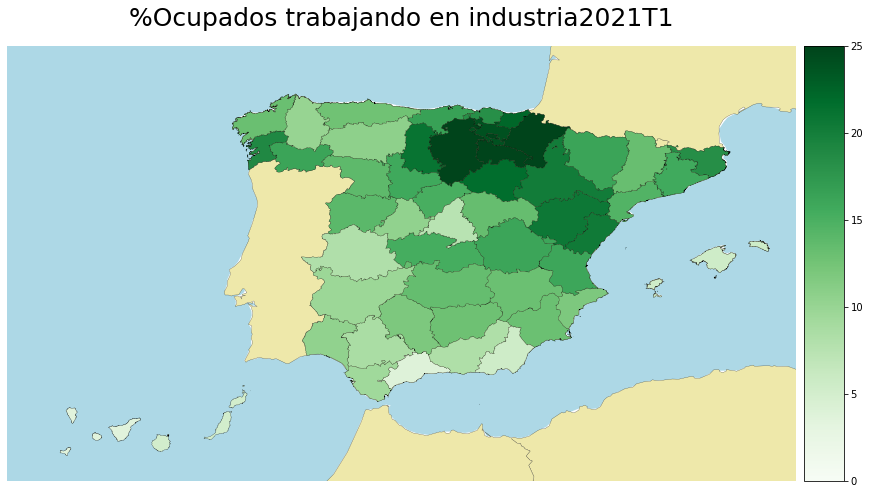

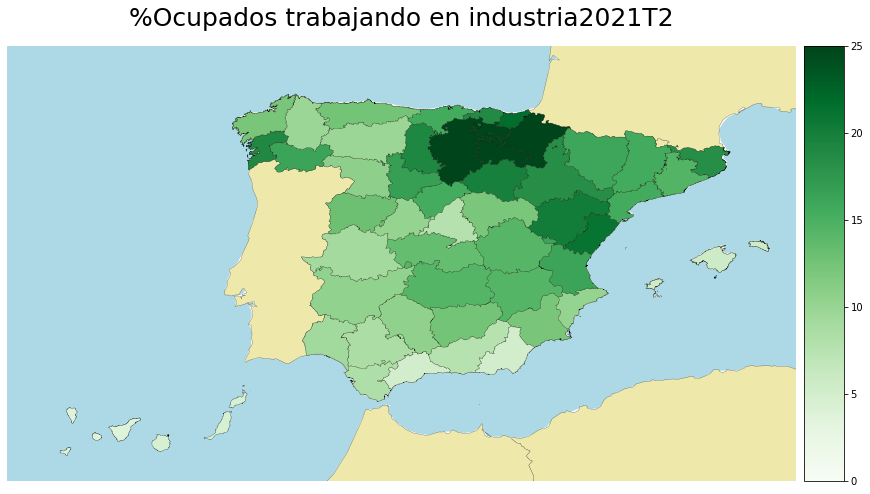

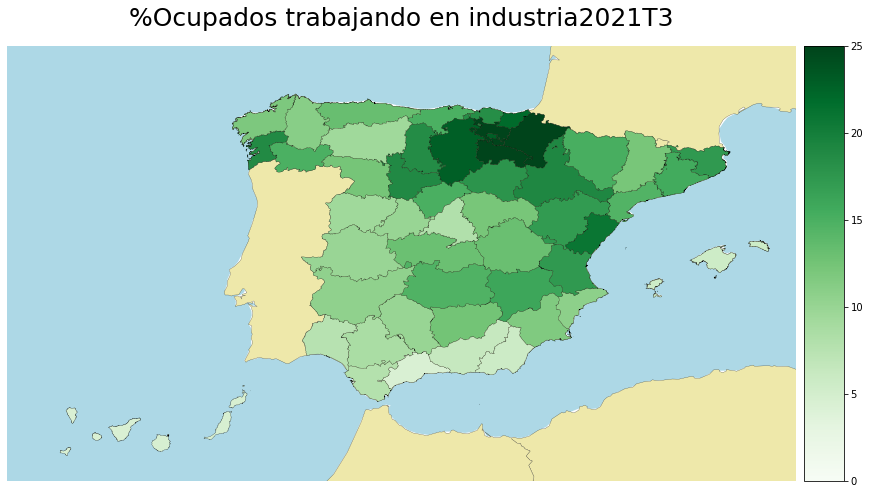

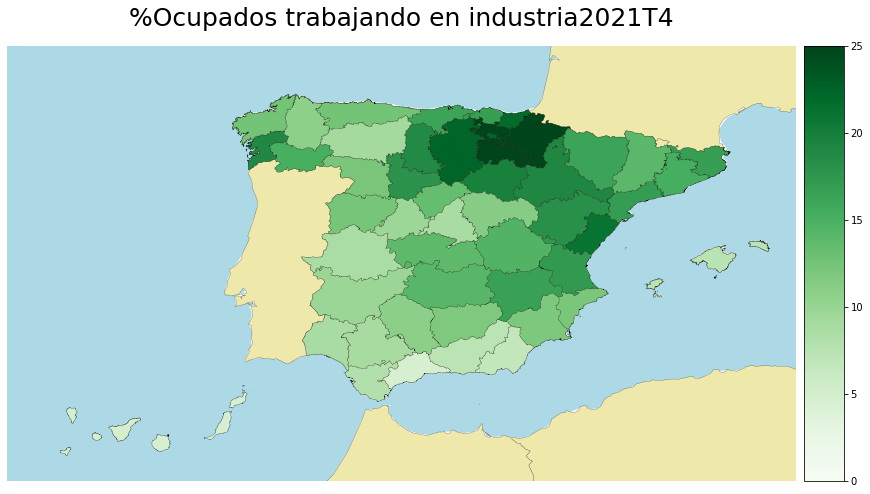

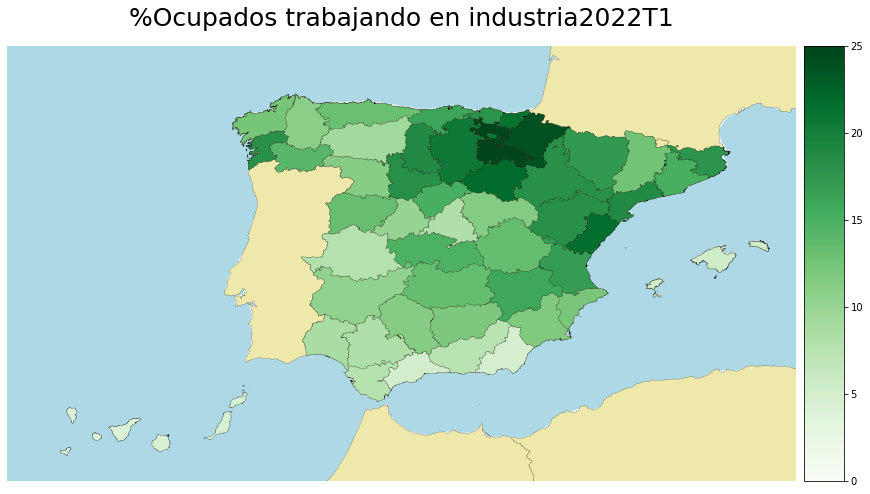

In [4]:
datos["Codigo"] = datos["Provincias"].str[:2]
datos = datos[["Codigo", "Provincias", "Periodo", "Total"]]

# Importamos datos geográficos que actualmente se encuentran en nuestro repositorio de GitHub
canarias = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/canarias_provincias.zip?raw=true')
peninsula_baleares = gpd.read_file('https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/peninsula_provincias.zip?raw=true')

Canarias_Acercadas = canarias
from shapely import affinity
Canarias_Acercadas["geometry"] = Canarias_Acercadas["geometry"].apply(affinity.translate, xoff=4.5, yoff=7) #Con la función apply() aplicamos la función affinit

# Unimos los datos cartograficos
mapa = gpd.GeoDataFrame(pd.concat([peninsula_baleares, Canarias_Acercadas]))

# Creamos una nueva columna que después añadiremos a nuestro DataFrame
mapa["Codigo"] = mapa["NATCODE"].str[4:6] # Para quedarnos con el código de la provincia

# Creamos una columna para cada Periodo
datos_evolucion = datos.pivot_table('Total', ['Codigo', 'Provincias'], 'Periodo')
datos_evolucion.reset_index( drop=False, inplace=True)

# Nos quedamos con las columnas más relevantes del dataframe con información geográfica
mapa_evolucion = mapa[["Codigo", "geometry"]] 
mapa_evolucion = pd.merge(mapa_evolucion, datos_evolucion) # Realizamos la unión, que se hará en base a las colu

# Creamos la lista de fotogramas vacía:
fotogramas = []

# Creamos el bucle for que pasará por todos los elementos de la lista de columna empezando por el cuarto:
for fechas in mapa_evolucion.columns.to_list()[3:]:

    fig, ax = plt.subplots(1, 1, figsize=(15, 15))
    ax.axis([-15, 5, 34, 45]) 
 
    # Título y ejes:
    ax.set_title(f"{Nombre}" + str(fechas), #Ponemos f"{Nombre}" para que nos salga lo que hemos introducido antes como nombre de mapa
                  pad = 20, 
                  fontdict={"fontsize":25}) 
    ax.set_xlabel("Longitud", fontsize=20)
    plt.xticks(fontsize=15)
    ax.set_ylabel("Latitud", fontsize=20)
    plt.yticks(fontsize=15)
    plt.grid(True, zorder=0)

    # Eliminar ejes
    ax.set_axis_off()

    # Leyenda
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right",
                              size="5%",
                              pad=0.1) # Para separar la leyenda un poco del mapa

    mapa_evolucion.plot(ax=ax,
               column=fechas,
               cmap=C, # Seleccionamos un Colormaps acorde a lo que queremos representar, en este caso C sirve para que seleccione el código de color del color que hemos seleccionado antes.
               edgecolor="black",
               linewidth=0.2,
               legend=True,
               # Indicamos el número mínimo y máximo de nuestra leyenda acorde a los datos que tenemos
               norm=plt.Normalize(vmin=f'{Mínimo}', vmax=f'{Máximo}'), #Usamos otra vez f para que nos salga lo que hemos introducido antes
               cax=cax,
               zorder=5); 

    oceanos_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/oceanos.zip?raw=true'
    mapa_oceanos = gpd.read_file(oceanos_file)#.to_crs("EPSG:3395")
    mapa_oceanos.plot(ax=ax,
                    color="lightblue",
                    zorder=0);
 
    paises_file = r'https://github.com/AlejandroDGR/Proyecto_Difusion_Universitarios_INE/blob/master/mapas/paises.zip?raw=true'
    mapa_paises = gpd.read_file(paises_file)#.to_crs("EPSG:3395")
    mapa_paises.plot(ax=ax,
                   color="palegoldenrod",
                   edgecolor="black",
                   linewidth=0.2,
                   zorder=2);

# Creamos el GIF
    f = io.BytesIO() # Creamos un objeto que va a contener elementos binarios 
    imagen = ax.get_figure() # Vamos "capturando", uno a uno, los mapas que vamos creando
    imagen.savefig(f, # Guadamos la información de cada mapa
                   format="png", # Formato
                   bbox_inches="tight") 
    f.seek(0) 
    fotogramas.append(PIL.Image.open(f)) # Con append() vamos añadiendo cada mapa a la lista de fotogramas.


fotogramas[0].save(f"{Nombre}.gif", #Usamos f para el t´tulo del GIF sea el que hemos seleccionado
                   format="GIF", 
                   append_images = fotogramas[1:], 
                   save_all = True,
                   duration = 1200, # Duración en milisegundos del GIF
                   loop=0) # Para que vuelva a empezar el GIF

f.close() # Cerramos el archivo binario 

# Se mostraran todos los archivos png que hemos utilizado para formar el GIF, 
# como no los necesitamos, pulsamos en la parte izquierda y borramos los resultados mostrados (x)

# Leemos el GIF previamente guardado
from IPython.display import Image
from matplotlib import animation
Image(open(f"/content/{Nombre}.gif", "rb").read()) 

# Descargamos el GIF
from google.colab import files
files.download(f"{Nombre}.gif") 
